<a href="https://colab.research.google.com/github/7692TITO/Linear-Regression-ML-model/blob/main/Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.preprocessing import MinMaxScaler                 # model buliding libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df2 = pd.read_csv('/content/Car details v3.csv')
df3 = pd.read_csv('/content/car data.csv')

First Look on data

In [ ]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df1.shape

(4340, 8)

In [ ]:
len(df1[df1.duplicated()])         #find duplicate records in dataset,therefore remove them first

763

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.shape

(3577, 8)

In [ ]:
df1.isnull().sum()         # our dataset doesn't have any missing values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

#**EDA**

##Target Feature analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


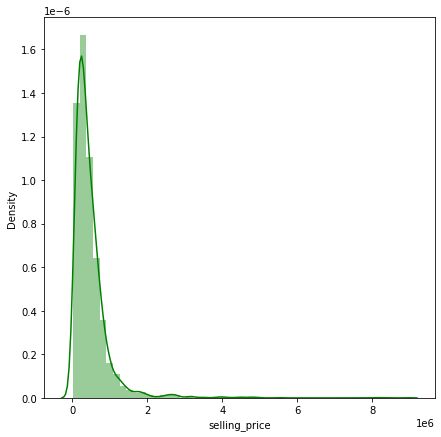

In [ ]:
# target variable distribution check
plt.figure(figsize=(7,7))
sns.distplot(df1['selling_price'],color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


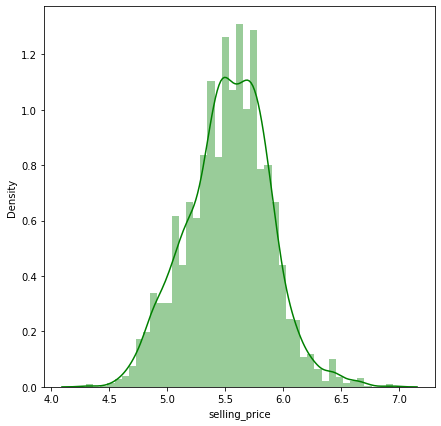

In [ ]:
# Handling the skewnwess in target variable
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df1['selling_price']),color ='green')

## Numerical features analysis

In [ ]:
numerical_features = df1.describe().columns
numerical_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

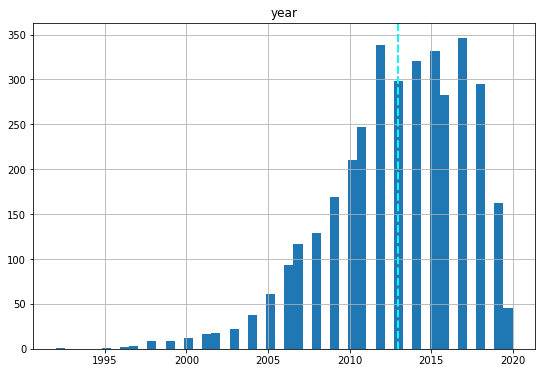

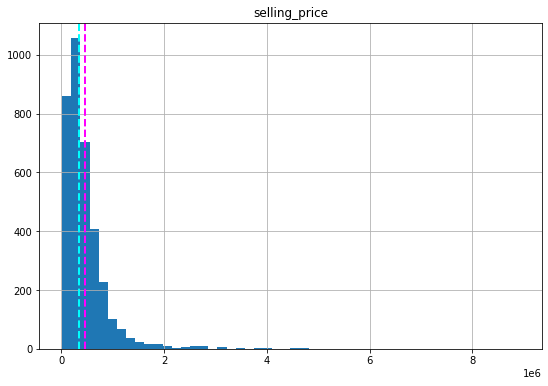

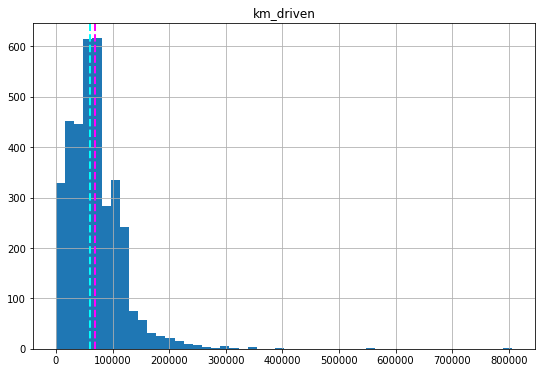

In [ ]:
# plot a bar plot for each numerical features

for col in numerical_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df1[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

#Transformation

Below are the some type of method or way to deal above type of problem.

square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

log for greater skew: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

Linearity and heteroscedasticity: First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

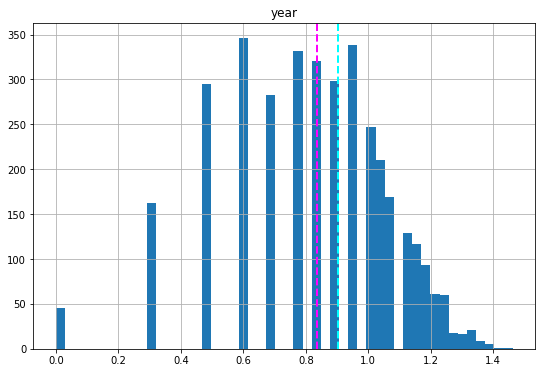

In [ ]:
#Handling skewness in numerical features
#for left skew in year feature
for col in numerical_features[0:1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log10(max(df1[col]+1) - df1[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

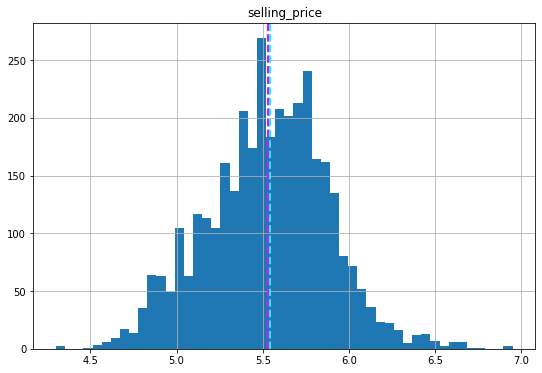

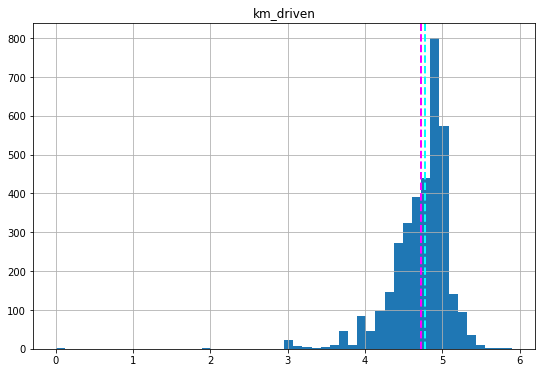

In [ ]:
#for right skew in selling_price and Km_driven feature
for col in numerical_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log10(df1[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##Check for linearity btw numerical features vs target variable

In [ ]:
independent_numerical= numerical_features.delete(1)
independent_numerical

Index(['year', 'km_driven'], dtype='object')

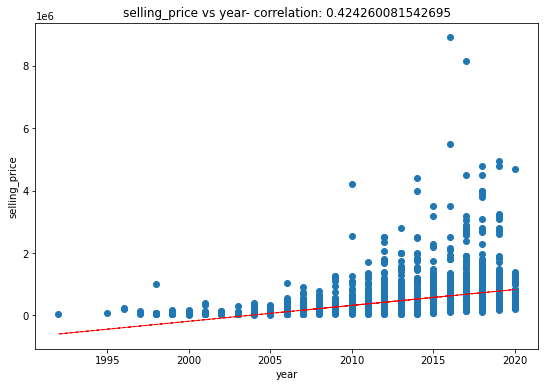

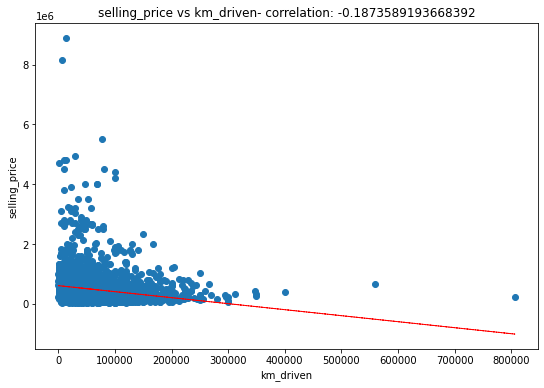

In [ ]:
# correlation in numerical features

for col in independent_numerical[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df1[col]
    label = df1['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('selling_price')
    ax.set_title('selling_price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df1[col], df1['selling_price'], 1)
    y_hat = np.poly1d(z)(df1[col])

    plt.plot(df1[col], y_hat, "r--", lw=1)

plt.show()

#Handling Outliers in Numerical Features

In [ ]:
# Let's keep record of year between 2005 and 2020 ,rest of the records have outliers
# Let's keep record of Km_driven below 200000,rest of the records carries outliers
df1= df1[df1['year']>=2005]
df1 = df1[df1['km_driven']<= 200000]
df1.reset_index(inplace=True)
del df1['index']

Let Check again whether we able to remove the outlier or not

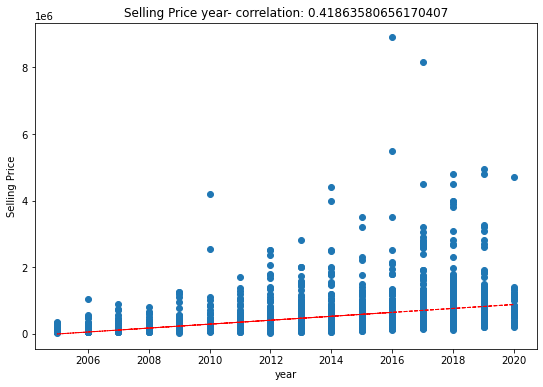

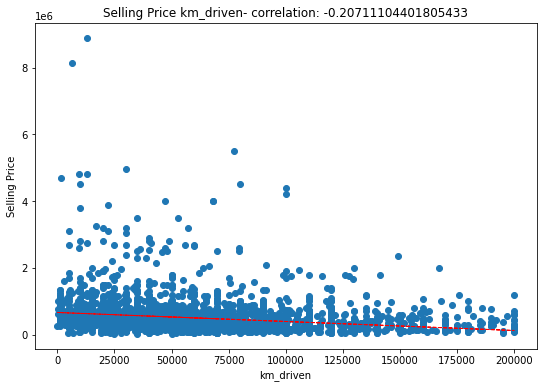

In [ ]:
for col in independent_numerical:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df1[col]
   label = df1['selling_price']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Selling Price')
   ax.set_title('Selling Price ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df1[col], df1['selling_price'], 1)
   y_hat = np.poly1d(z)(df1[col])
 
   plt.plot(df1[col], y_hat, "r--", lw=1)
 
plt.show()

After removing outlier we are getting our scatter plot in a quiet well manner now we can find out the relation between them..
Here we can say that..

If the KM_driven is less then price will be high for the car.

If the car is too old then it will be relativily cheap then latest one.


Let's try to  find and remove the multicollinearity from our dataset and also find some correlation between numerical data.
<br> we can also use some feature engineering to create someother variable with existing one to get more understanding the data.

##Check for multicolinearity

In [ ]:
# adding a new feature
df1['Car_age'] = 2020 - df1['year']

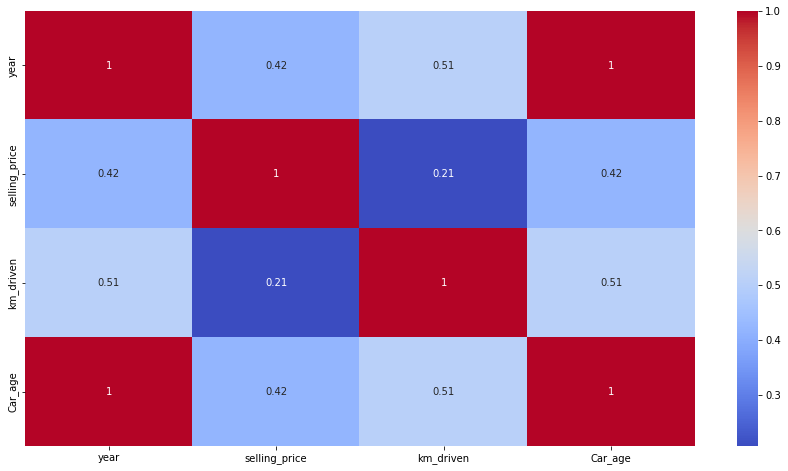

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

From above It's clear that  Car Age and Year is have strong relation or they can provide same info so we can remove year column from our dataset.
<br> KM_driven has an average relation so we can keep that variable for our model.

In [ ]:
df1.drop('year',axis=1,inplace=True)

##Checking multicolinearity using vif

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['selling_price']]])

,variables,VIF
0,km_driven,4.2816
1,Car_age,4.2816


In [ ]:
numerical_features = ['km_driven','Car_age']

##Categorical features 

In [ ]:
df1['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [ ]:
df1['company']= df1['name'].str.split(' ',expand=True)[0]
df1['company'] = df1['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche','Bmw' : 'BMW','Mg' : 'MG'})
df1['company'] = df1['company'].str.title()
df1['company'].value_counts()

Maruti           993
Hyundai          614
Mahindra         300
Tata             299
Ford             215
Honda            207
Toyota           154
Chevrolet        150
Renault          110
Volkswagen        92
Nissan            52
Skoda             46
Audi              31
Fiat              30
Datsun            29
Bmw               25
Mercedes-Benz     19
Jaguar             5
Mitsubishi         5
Land               5
Volvo              4
Jeep               3
Mg                 2
Ambassador         2
Force              1
Isuzu              1
Kia                1
Name: company, dtype: int64

In [ ]:
df1.drop('name',axis=1,inplace=True)

In [ ]:
df1.head(3)

,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_age,company
0,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai


#Analysis of Categorical features

In [ ]:
categorical_features = df1.describe(include= object).columns

In [ ]:
categorical_features

Index(['fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

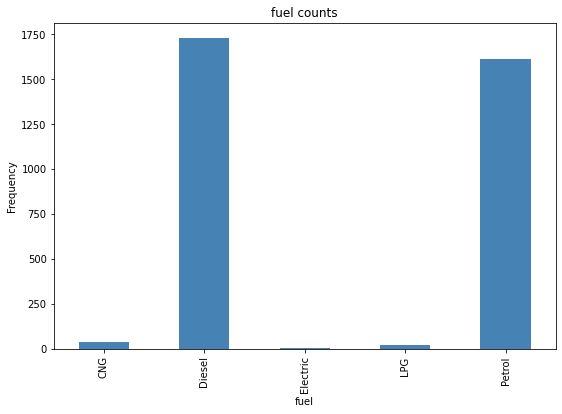

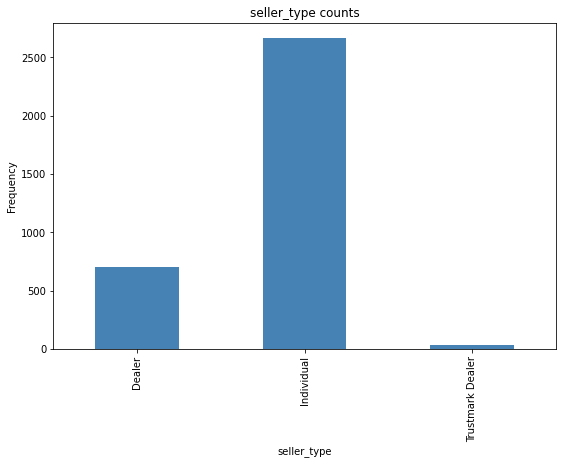

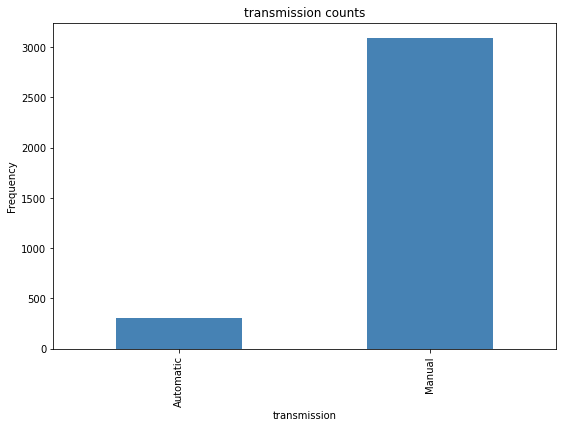

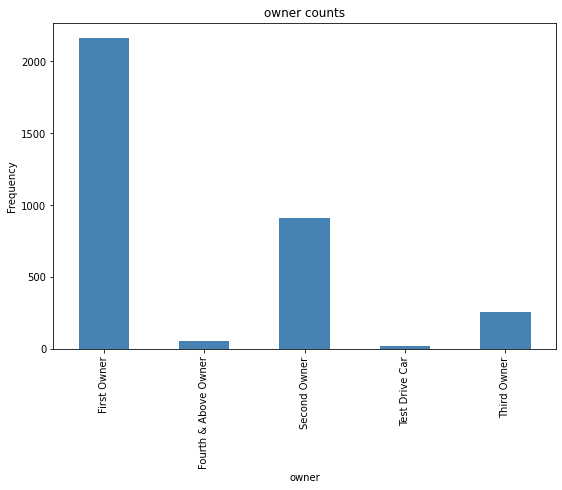

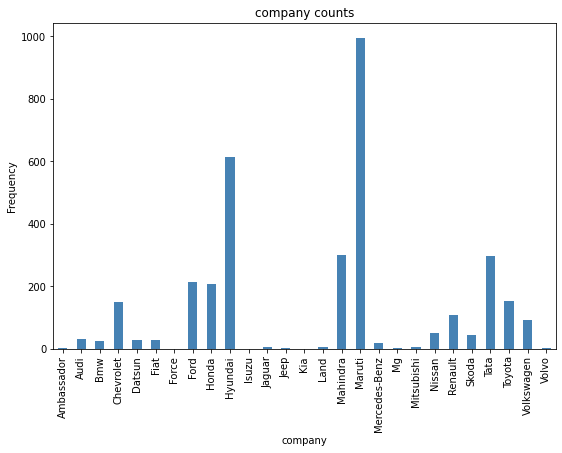

In [ ]:
for col in categorical_features[:]:
  counts = df1[col].value_counts().sort_index()
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  counts.plot.bar(ax = ax, color='steelblue')
  ax.set_title(col + ' counts')
  ax.set_xlabel(col) 
  ax.set_ylabel("Frequency")
plt.show()

##Check for Outliers 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

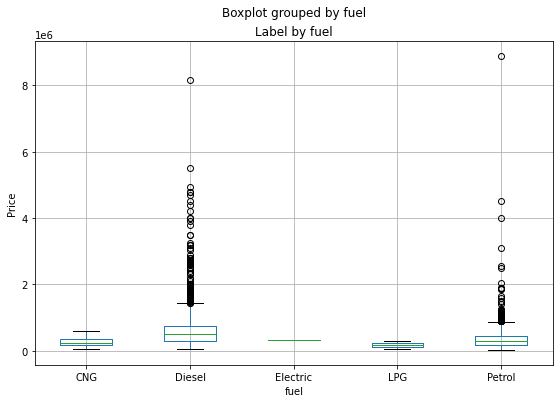

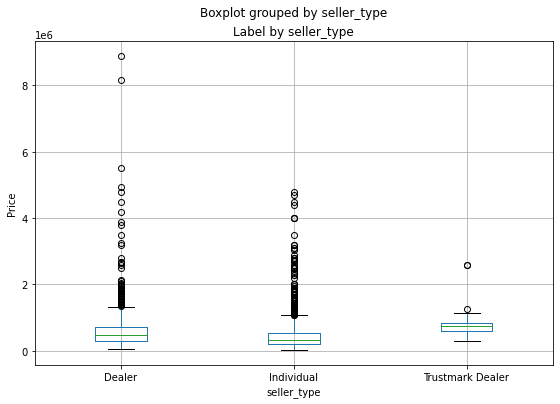

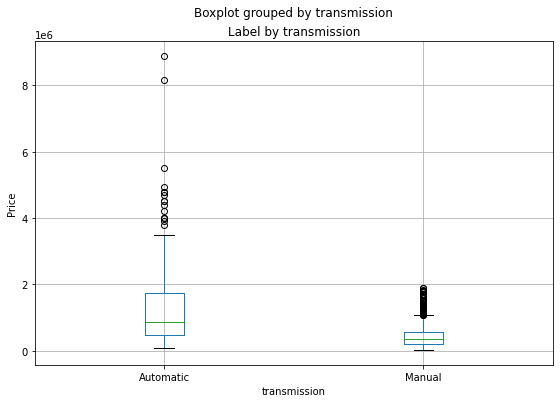

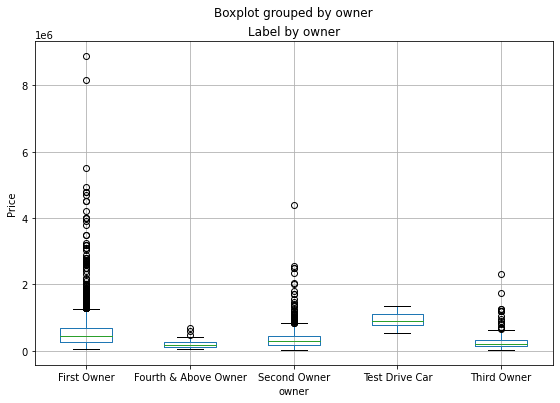

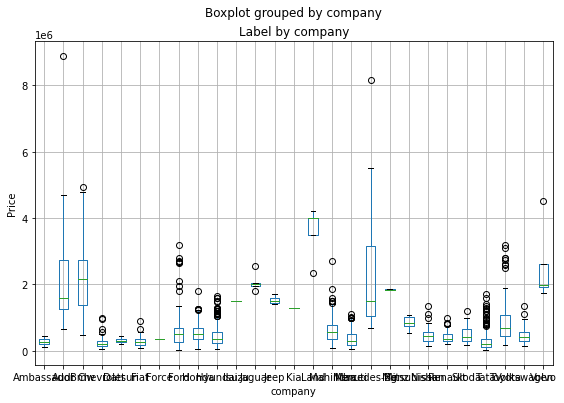

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df1.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

##Adding new feature

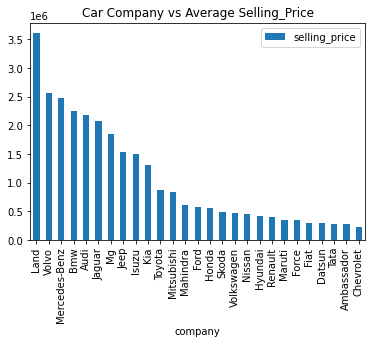

In [ ]:
df_company= pd.DataFrame(df1.groupby(['company'])['selling_price'].mean().sort_values(ascending=False))
df_company.plot.bar()
plt.title('Car Company vs Average Selling_Price')
plt.show()

In [ ]:
df_company.rename(columns={'selling_price':'avg_selling_price'},inplace=True)


In [ ]:
df_company['avg_selling_price'].unique()

array([3609800.        , 2556250.        , 2470210.52631579,
       2242800.        , 2185451.61290323, 2072999.8       ,
       1842500.        , 1530000.        , 1500000.        ,
       1300000.        ,  873837.61038961,  843000.        ,
        614943.3       ,  570260.42325581,  557067.58454106,
        492217.39130435,  462880.39130435,  457038.40384615,
        423908.747557  ,  408399.97272727,  350566.9305136 ,
        346000.        ,  300066.63333333,  296551.65517241,
        282829.76588629,  275000.        ,  232397.92      ])

In [ ]:
df1= df1.merge(df_company,on='company',how='left')

In [ ]:
df1.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_age,company,avg_selling_price
0,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514
1,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514
2,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai,423908.747557
3,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun,296551.655172
4,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda,557067.584541


In [ ]:
df1['company_cat'] = df1['avg_selling_price'].apply(lambda x : 0 if x < 400000 else (1 if 400000 <= x < 700000 else 2))

In [ ]:
df1['company_cat'].value_counts()

1    1636
0    1504
2     255
Name: company_cat, dtype: int64

In [ ]:
df1.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_age,company,avg_selling_price,company_cat
0,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514,0
1,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514,0
2,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai,423908.747557,1
3,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun,296551.655172,0
4,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda,557067.584541,1


#Data Preparation

In [ ]:
correlation.selling_price

year             0.418636
selling_price    1.000000
km_driven       -0.207111
Car_age         -0.418636
Name: selling_price, dtype: float64

In [ ]:
df = df1.copy()

In [ ]:
df.shape

(3395, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 0 to 3394
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   selling_price      3395 non-null   int64  
 1   km_driven          3395 non-null   int64  
 2   fuel               3395 non-null   object 
 3   seller_type        3395 non-null   object 
 4   transmission       3395 non-null   object 
 5   owner              3395 non-null   object 
 6   Car_age            3395 non-null   int64  
 7   company            3395 non-null   object 
 8   avg_selling_price  3395 non-null   float64
 9   company_cat        3395 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 291.8+ KB


#Feature Engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.




We shall convert categorical features to numeric type...

In [ ]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
#label encoding
label_encoders = {"fuel":{"Diesel":0,"Petrol":1,"CNG":2,"LPG":3,"Electric":4},
                 "seller_type":{"Individual":0,"Dealer":1,"Trustmark Dealer":2},
                 "transmission":     {"Manual": 0, "Automatic": 1},
                 "owner":{"First Owner": 0, "Second Owner": 1, "Fourth & Above Owner": 2, "Third Owner": 3,
                                  "Test Drive Car": 4 }
                   }

In [ ]:
df= df.replace(label_encoders)

In [ ]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_age,company,avg_selling_price,company_cat
0,60000,70000,1,0,0,0,13,Maruti,350566.930514,0
1,135000,50000,1,0,0,0,13,Maruti,350566.930514,0
2,600000,100000,0,0,0,0,8,Hyundai,423908.747557,1
3,250000,46000,1,0,0,0,3,Datsun,296551.655172,0
4,450000,141000,0,0,0,1,6,Honda,557067.584541,1


#Feature Selection

In [ ]:
independent_features = ['Car_age','km_driven','avg_selling_price'] 

In [ ]:
independent_features.extend(['fuel', 'seller_type', 'transmission', 'owner','company_cat'])

In [ ]:
independent_features

['Car_age',
 'km_driven',
 'avg_selling_price',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'company_cat']

In [ ]:
X= df[independent_features] # independent features

In [ ]:
y = np.log10(df['selling_price']) # dependent feature

# Scaling using standardization

In [ ]:
from scipy.stats import zscore

X = X.apply(zscore)

#Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2716, 8)
(679, 8)


#Buliding Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7401572378913932

In [ ]:
reg.coef_

array([-0.19173807, -0.0115646 ,  0.0831294 , -0.08029724,  0.02006049,
        0.04052299, -0.01403473,  0.05887834])

In [ ]:
reg.intercept_

5.5518849807537896

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([5.82441086, 5.82832203, 5.46895683, 5.40441043, 5.41120321,
       5.70967423, 5.61643214, 5.2994036 , 5.92303563, 5.40497855,
       5.37577858, 5.95902247, 5.66947842, 5.82614621, 5.5681693 ,
       5.53579289, 5.46041838, 5.78153246, 5.54164779, 5.09365502,
       5.9427845 , 5.83343063, 5.7525604 , 5.71051753, 5.39663579,
       4.97950854, 5.03458127, 5.78534382, 6.64211631, 5.19001263,
       5.4090278 , 5.01523537, 5.59773059, 5.15459609, 5.1098098 ,
       5.0143895 , 5.42695056, 5.63675785, 5.85895177, 6.61257523,
       5.76607948, 5.22846066, 5.49629916, 5.53080826, 5.45080674,
       5.62641085, 5.51926949, 5.41733307, 6.31808108, 5.34102124,
       5.55237293, 4.99797841, 5.41243217, 5.47868399, 5.43881099,
       5.33548676, 5.74330902, 5.63149997, 5.22921405, 5.79075616,
       5.56524815, 5.72518473, 6.11395857, 5.48631481, 5.61764739,
       5.30850973, 5.38154681, 5.40188898, 5.10160718, 5.51291925,
       5.28793926, 5.25971722, 5.29488164, 5.87124256, 5.51956

#Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 63039133233.41055
MAE : 147303.95373636775
RMSE : 251075.95112517357


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7541014747644261
Adjusted R2 :  0.7511653729705685


Text(0, 0.5, 'Predicted selling price')

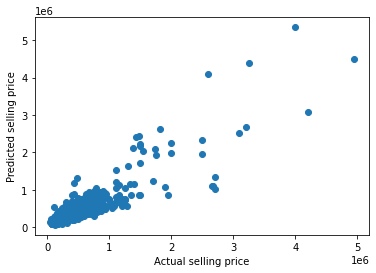

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

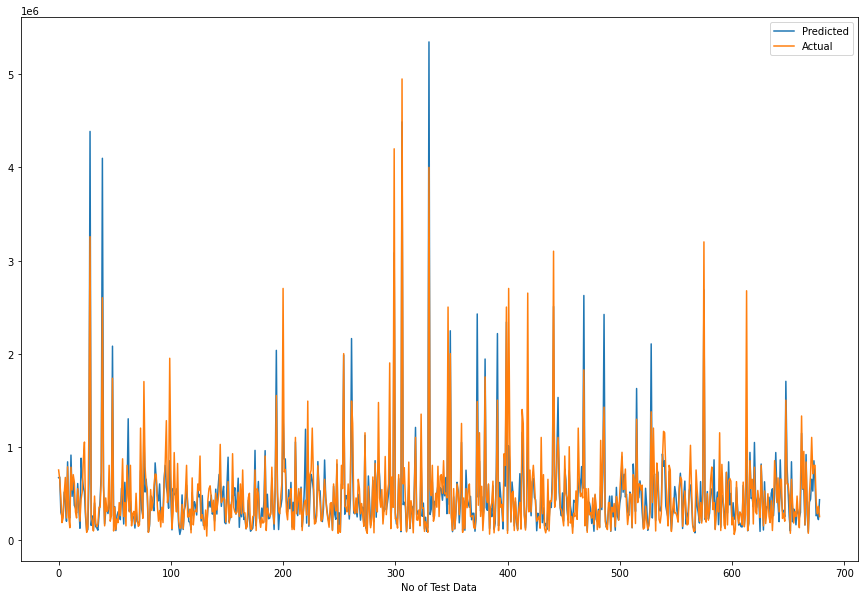

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Residuals:**

---
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line


Text(0.5, 0.98, 'Residual Analysis')

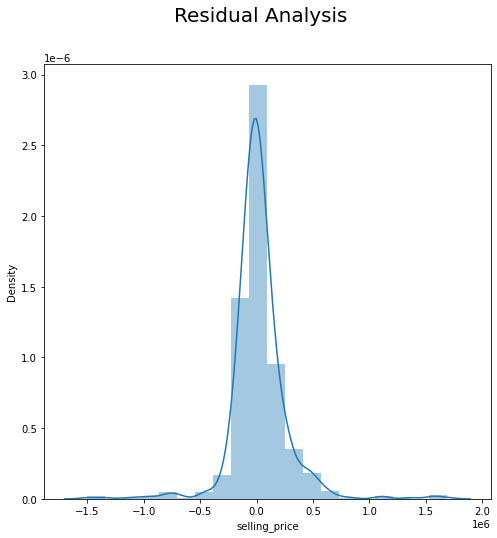

In [ ]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

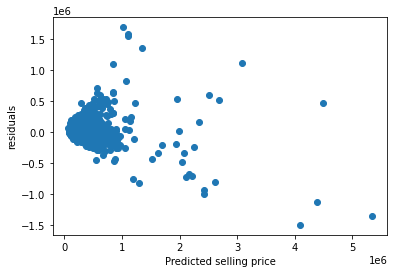

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred),10**(y_test)-10**(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

# **Linear regression model from statsmodels.api.**

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [ ]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1234.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:14:44   Log-Likelihood:                 1171.8
No. Observations:                3395   AIC:                            -2326.
Df Residuals:                    3386   BIC:                            -2270.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5522      0.003   1885.579      0.000       5.546       5.558
Car_age              -0.1938      0.004    -52.355      0.000      -0.201      -0.187
km_driven            -0.0074      0.004     -1.955      0.051      -0.015    2.25e-05
avg_selling_price     0.0816      0.004     18.465      0.000       0.073       0.090
fuel                 -0.0788      0.003    -24.178      0.000      -0.085      -0.072
seller_type           0.0226      0.003      7.395      0.000       0.017       0.029
transmission          0.0415      0.003     11.997      0.000       0.035       0.048
owner                -0.0133      0.003     -4.101      0.000      -0.020      -0.007
company_cat           0.0567      0.004     14.113      0.000       0.049       0.065
==============================================================================
Omnibus:                       43.020   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.016
Skew:                          -0.161   Prob(JB):                     1.53e-13
Kurtosis:                       3.560   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Implementing Lasso regression**

---
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7401568604902053

In [ ]:
lasso.coef_

array([-0.19173997, -0.01146206,  0.08312509, -0.08018288,  0.02000727,
        0.04046825, -0.01397745,  0.05882241])

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 62983006644.32174
MAE : 147267.74957950096
RMSE : 250964.15410237722
R2 : 0.7543204093337252
Adjusted R2 :  0.7513869216839787


Text(0, 0.5, 'Predicted selling price')

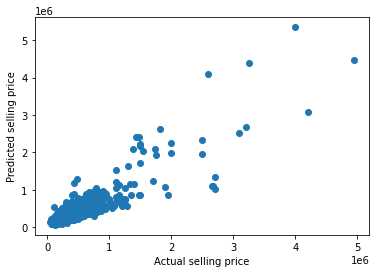

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_l))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

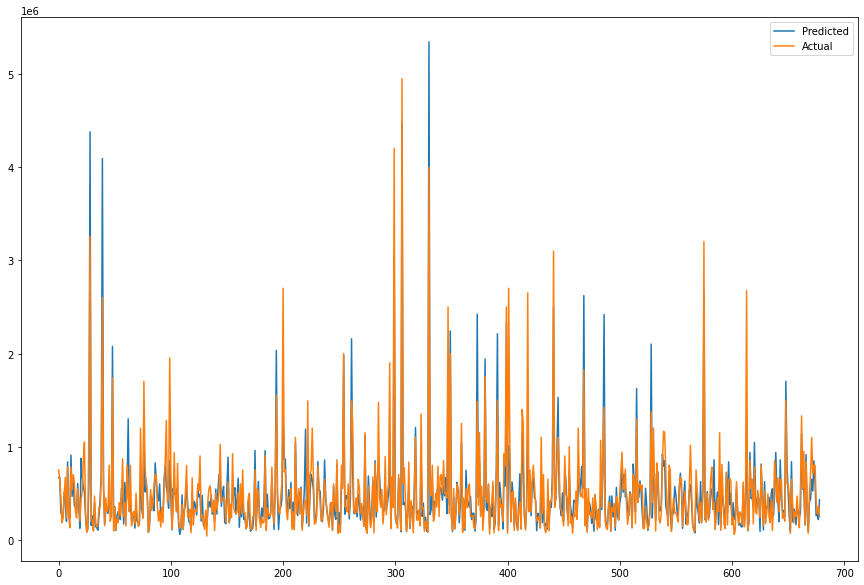

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_l))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

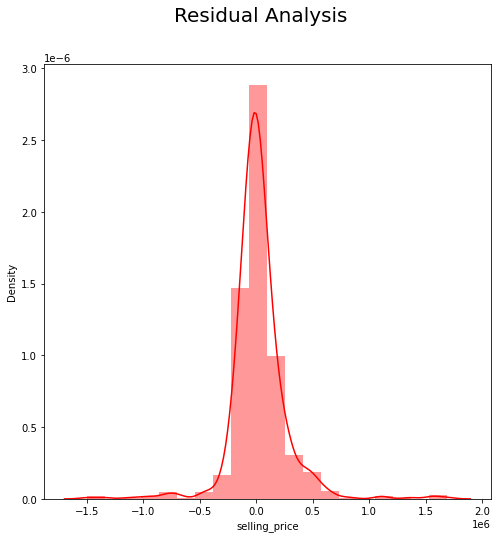

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)  

Text(0, 0.5, 'residuals')

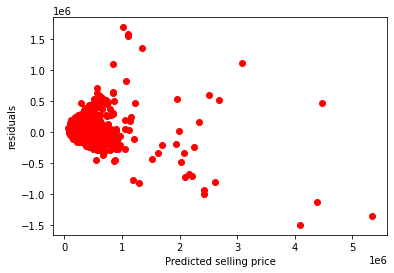

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_l),10**(y_test)-10**(y_pred_l),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

#Cross-Validation for Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.030084127579249897


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 62983006644.32174
MAE : 147267.74957950096
RMSE : 250964.15410237722
R2 : 0.7543204093337252
Adjusted R2 :  0.7513869216839787


Text(0, 0.5, 'Predicted selling price')

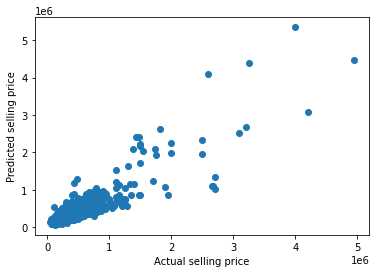

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_lasso))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

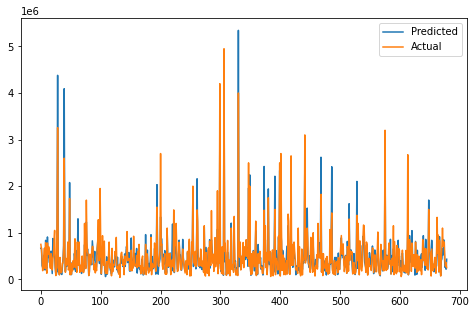

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

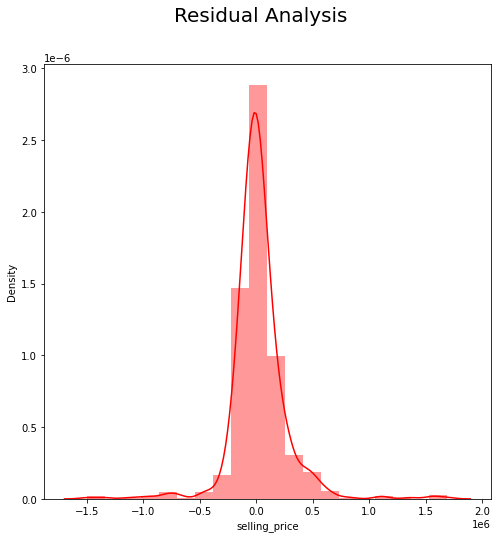

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_lasso)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

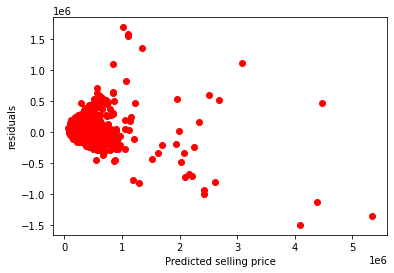

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

**<br>Implementing Ridge Regression**
---
Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.7401572372334471

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 63035875596.12223
MAE : 147302.70076969528
RMSE : 251069.46368708846
R2 : 0.7541141819220893
Adjusted R2 :  0.7511782318554875


Text(0, 0.5, 'Predicted selling price')

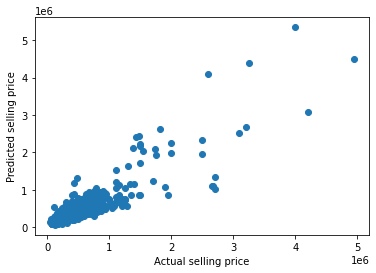

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_r))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

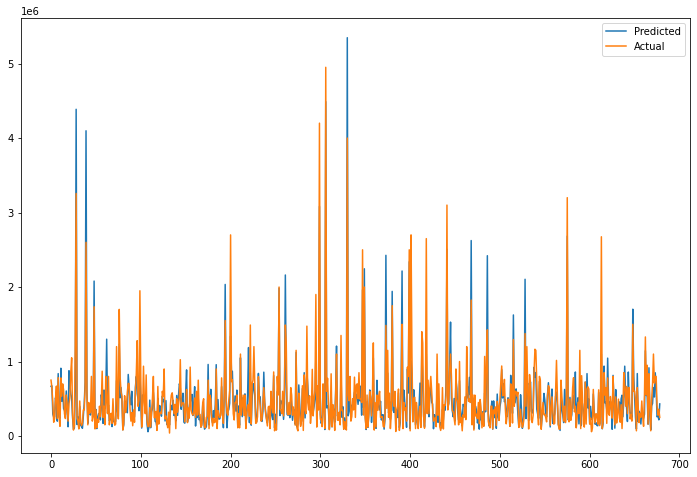

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(10**(y_pred_r))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

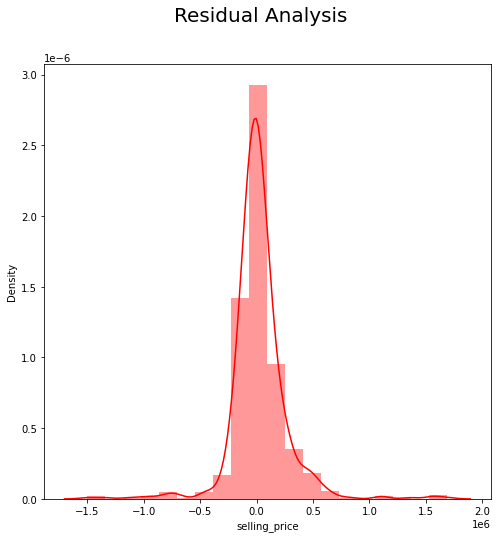

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)  

Text(0, 0.5, 'residuals')

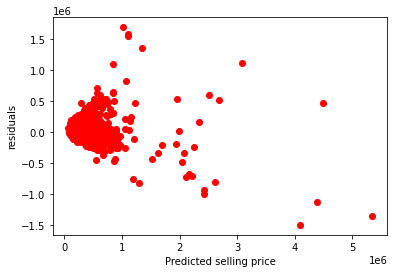

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_r),10**(y_test)-10**(y_pred_r),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.030011351605845695


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 63006669827.85092
RMSE : 251011.2942236881
R2 : 0.7542281056862328
Adjusted R2 :  0.7512935159033818


Text(0, 0.5, 'Predicted selling price')

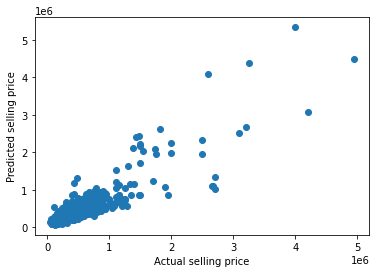

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_ridge))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

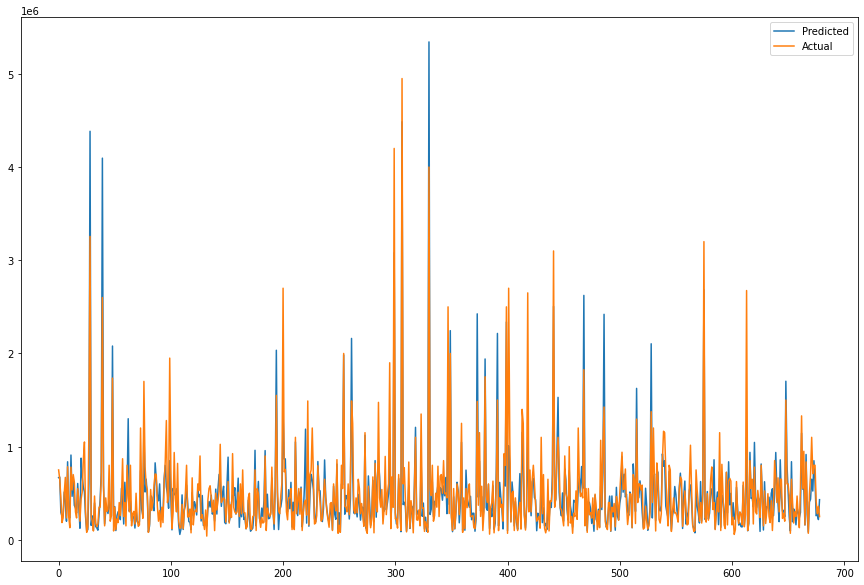

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

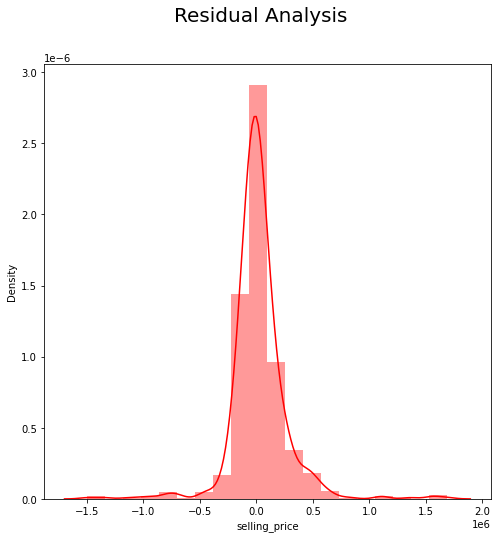

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

Text(0, 0.5, 'residuals')

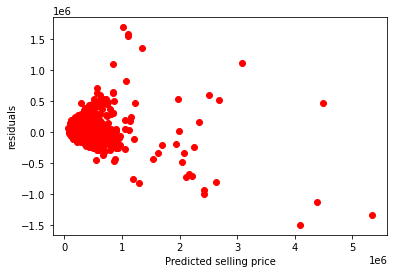

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_ridge),10**(y_test)-10**(y_pred_ridge),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

# **Conclusion**



---
From above model we can conclude that below point:

*  Automatic vehicles fetch higher resale price compared to manual ones.
*  Age of the vehicle seems to show negative correlation with selling price.
* Past_Owners and Kms_Driven are showing very less correlation with selling price.
*  Resale value of cars with Fuel type CNG is higher as comapre to other.
* Average price of a car directly influences Selling Price prediction.Both are highly correlated and here directly proportional to each other.

